# Data Exploration Report – Preventive Healthcare CHD Analysis

This notebook explores the cleaned heart disease dataset, examining relationships between lifestyle factors, health history, and 10-year CHD risk.  

Insights support the hypotheses:

- **H1:** Demographics, lifestyle, and health data predict disease risk.  
- **H2:** Visualizations help non-technical staff understand risk patterns.  
- **H3:** Predictive models can support preventive measures and reduce costs.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sys.path.append(os.path.abspath("../src"))
from helper_functions import (
    show_boxplots, show_histograms, show_scatter_matrix,
    show_correlation_heatmap, show_grouped_histograms, show_binned_data
)

# Load Clean Data
df = pd.read_csv("../data/processed/heart_disease_clean_v2.csv")

# Define Column Groups
continuous_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
binary_cols = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


## 1. Summary Tables

### Continuous Variables
Summary statistics help identify central tendency, spread, and outliers. These insights indicate which variables may predict CHD risk (supports H1).

### Binary Variables
Percentages show population prevalence for each binary factor. High-risk factors such as smoking or diabetes can be visually assessed for association with CHD (supports H1).


In [9]:
# Continuous Variables Summary
summary_stats = df[continuous_cols].describe().T
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']
summary_stats

# Binary Variables Summary (% of population)
binary_summary = pd.DataFrame({col: df[col].value_counts(normalize=True) * 100 for col in binary_cols}).T
binary_summary


,0.0,1.0
male,57.075472,42.924528
currentSmoker,50.589623,49.410377
BPMeds,97.075472,2.924528
prevalentStroke,100.000000,NaN
prevalentHyp,68.938679,31.061321
diabetes,97.429245,2.570755
TenYearCHD,84.811321,15.188679


## 2. Boxplots

Boxplots show distribution and outliers for continuous variables. Variables like age, BMI, and blood pressure have higher medians in the CHD group, suggesting predictive value (supports H1).


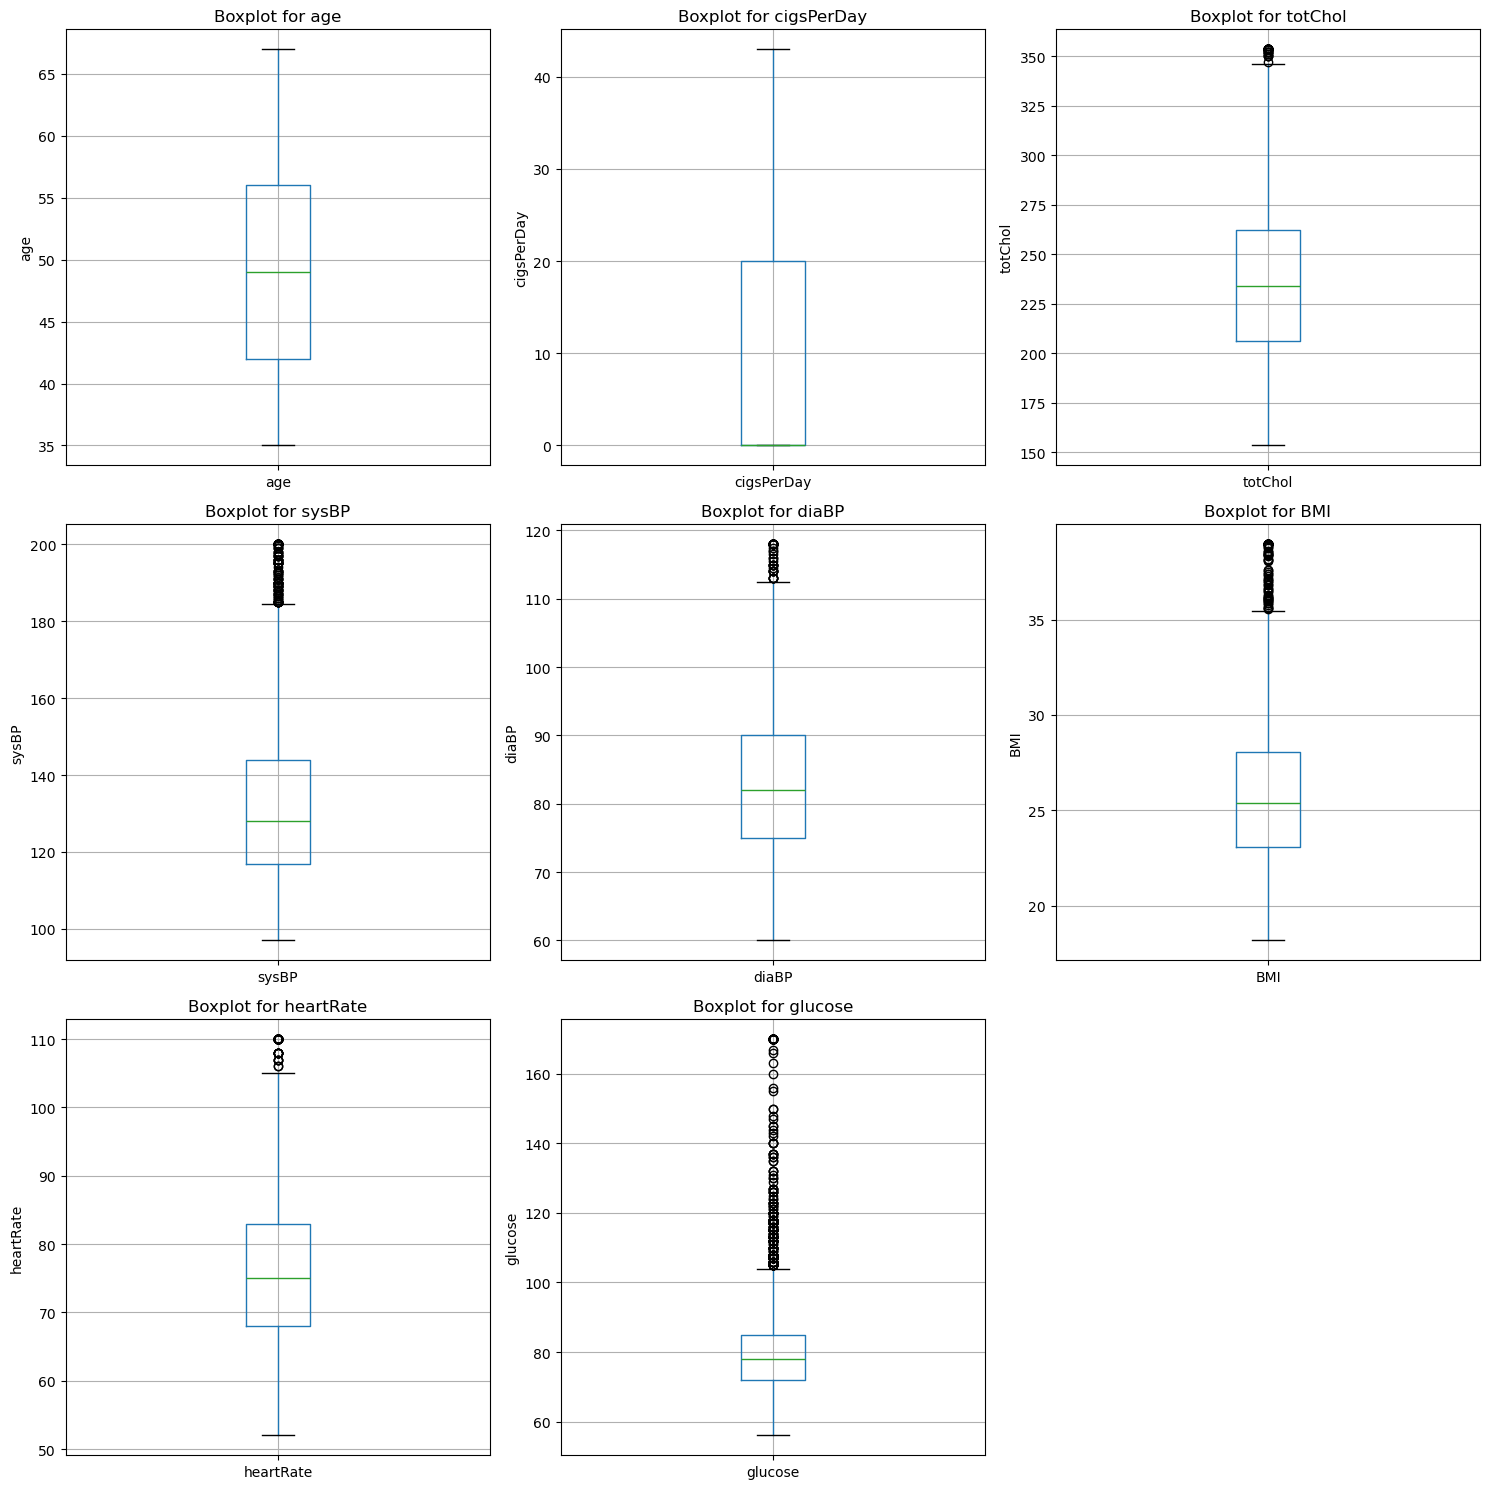

(<Figure size 1500x1500 with 9 Axes>,
 array([<Axes: title={'center': 'Boxplot for age'}, ylabel='age'>,
        <Axes: title={'center': 'Boxplot for cigsPerDay'}, ylabel='cigsPerDay'>,
        <Axes: title={'center': 'Boxplot for totChol'}, ylabel='totChol'>,
        <Axes: title={'center': 'Boxplot for sysBP'}, ylabel='sysBP'>,
        <Axes: title={'center': 'Boxplot for diaBP'}, ylabel='diaBP'>,
        <Axes: title={'center': 'Boxplot for BMI'}, ylabel='BMI'>,
        <Axes: title={'center': 'Boxplot for heartRate'}, ylabel='heartRate'>,
        <Axes: title={'center': 'Boxplot for glucose'}, ylabel='glucose'>,
        <Axes: >], dtype=object))

In [10]:
# Boxplots for continuous variables
show_boxplots(df[continuous_cols], layout="grid")


## 3. Histograms

Histograms reveal distribution skewness. Variables like cigsPerDay are heavily skewed; age and BMI are roughly normal. Understanding distributions helps in modeling and assessing risk (supports H1).


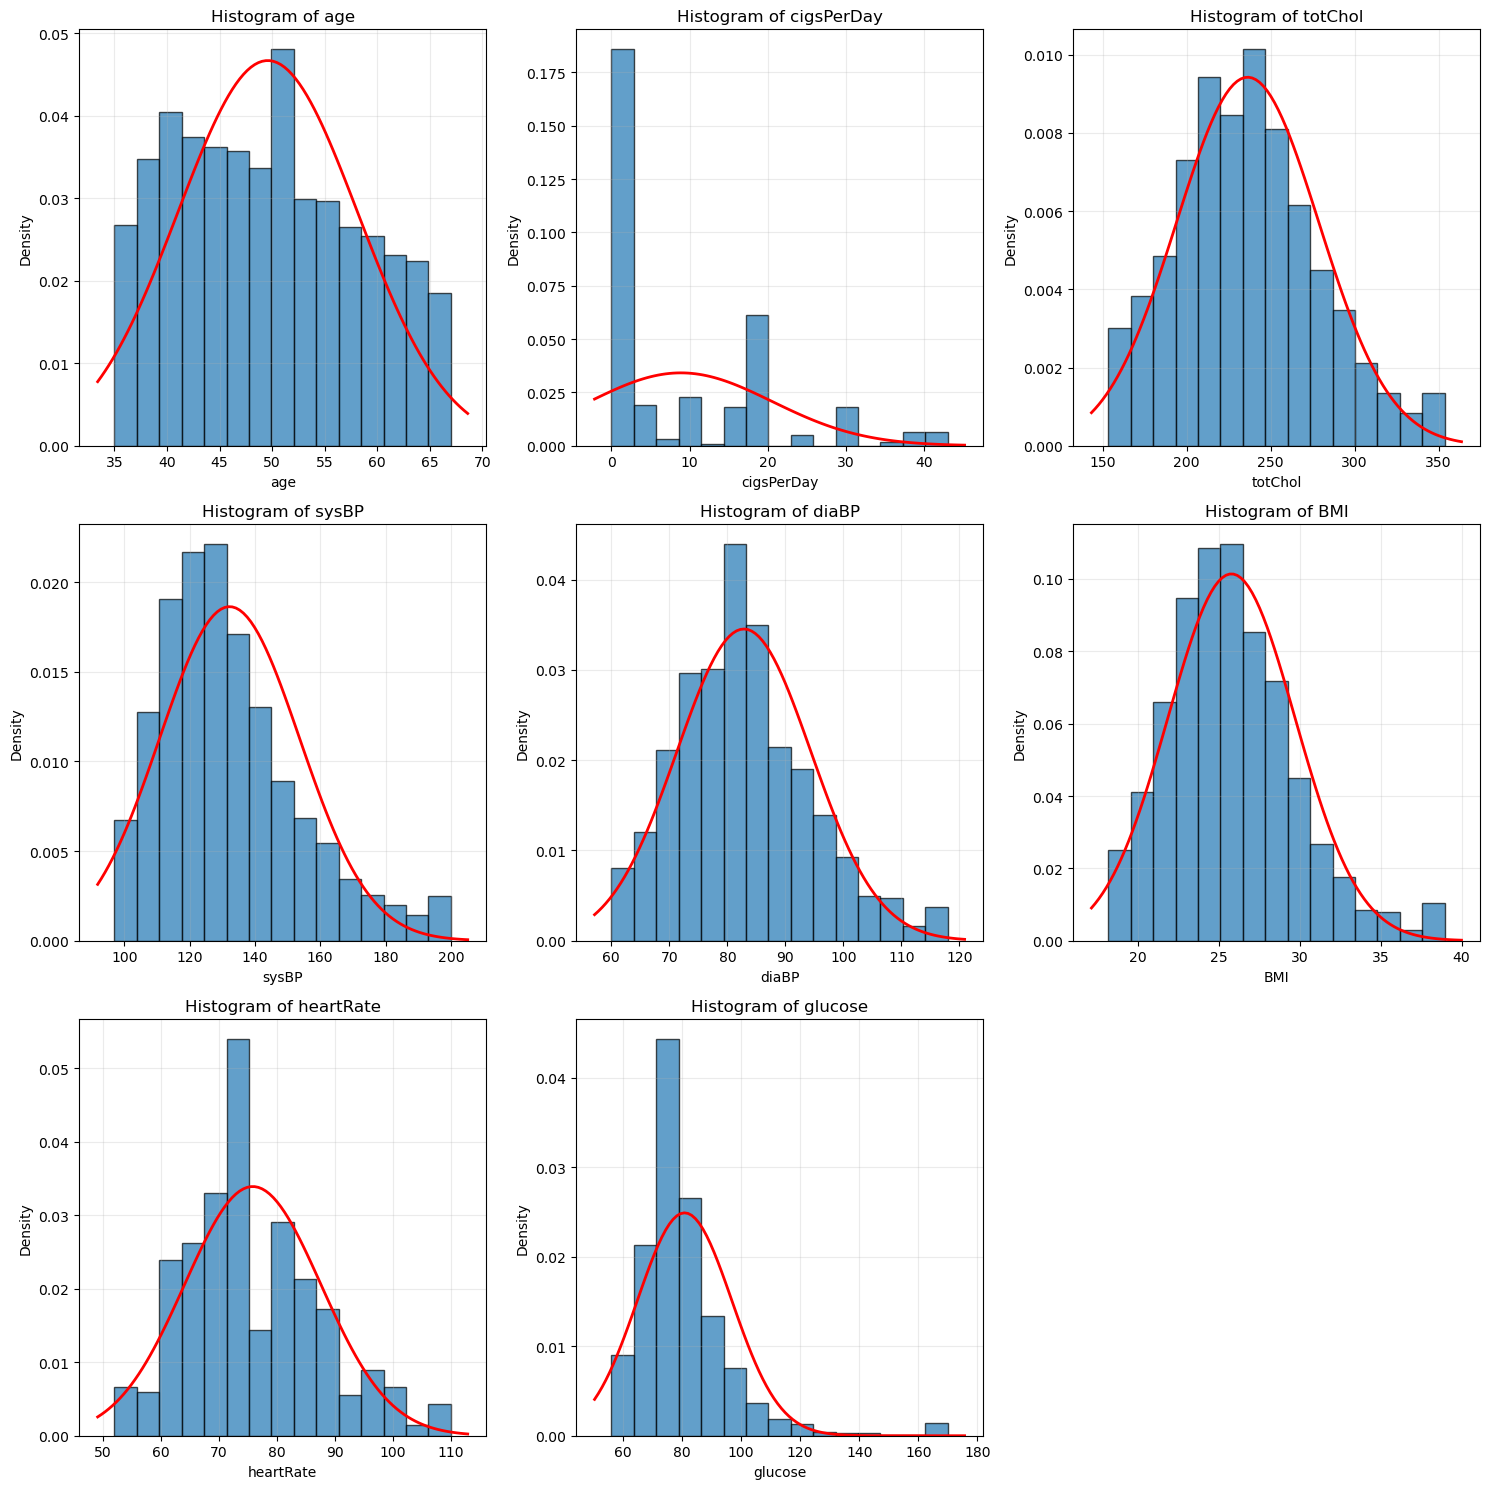

(<Figure size 1500x1500 with 9 Axes>,
 array([<Axes: title={'center': 'Histogram of age'}, xlabel='age', ylabel='Density'>,
        <Axes: title={'center': 'Histogram of cigsPerDay'}, xlabel='cigsPerDay', ylabel='Density'>,
        <Axes: title={'center': 'Histogram of totChol'}, xlabel='totChol', ylabel='Density'>,
        <Axes: title={'center': 'Histogram of sysBP'}, xlabel='sysBP', ylabel='Density'>,
        <Axes: title={'center': 'Histogram of diaBP'}, xlabel='diaBP', ylabel='Density'>,
        <Axes: title={'center': 'Histogram of BMI'}, xlabel='BMI', ylabel='Density'>,
        <Axes: title={'center': 'Histogram of heartRate'}, xlabel='heartRate', ylabel='Density'>,
        <Axes: title={'center': 'Histogram of glucose'}, xlabel='glucose', ylabel='Density'>,
        <Axes: >], dtype=object))

In [11]:
# Histograms for continuous variables
show_histograms(df[continuous_cols], bins=15, layout="grid", bell_curve=True)


## 4. Correlation Heatmap

Identifies which numeric variables are most strongly associated with CHD. Age, systolic BP, BMI, and glucose show strong positive correlations, highlighting key predictors (supports H1).


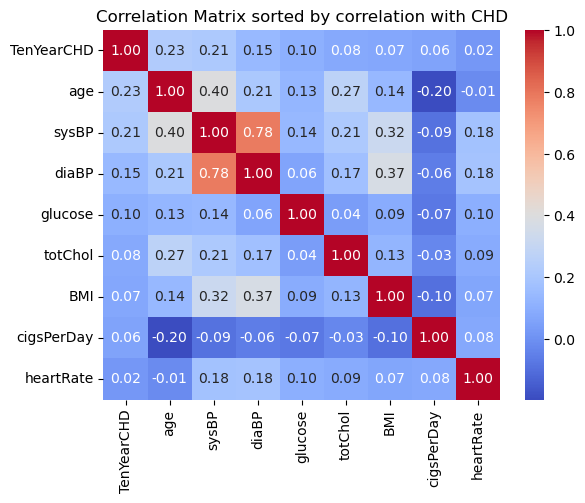

In [12]:
# Correlation Heatmap
corr = df[continuous_cols + ['TenYearCHD']].corr()['TenYearCHD'].sort_values(ascending=False)
sns.heatmap(df[continuous_cols + ['TenYearCHD']].corr().loc[corr.index, corr.index], annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix sorted by correlation with CHD')
plt.show()


## 5. Grouped Histograms by CHD

Grouped histograms show distribution differences for patients with and without CHD. Higher medians in CHD groups confirm predictive potential (supports H1).


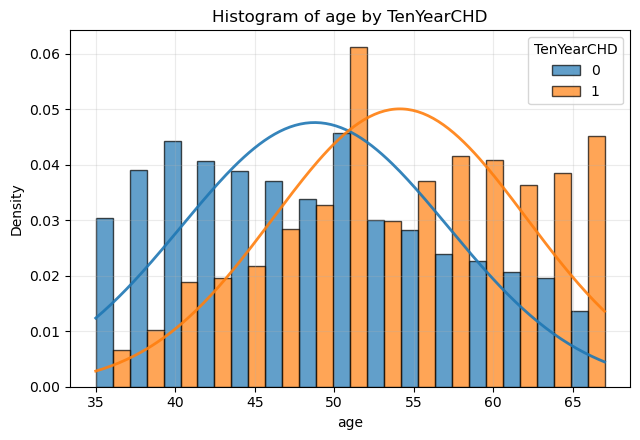

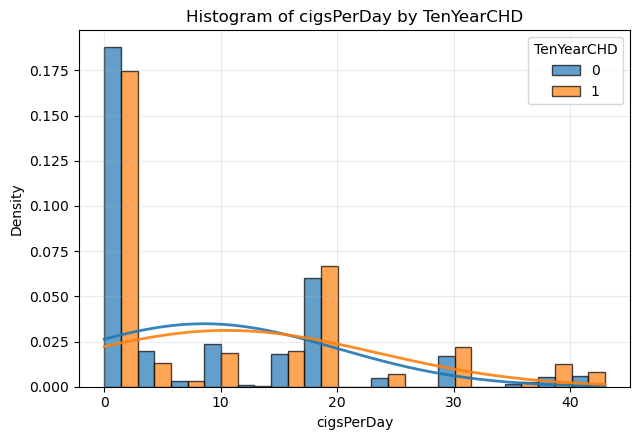

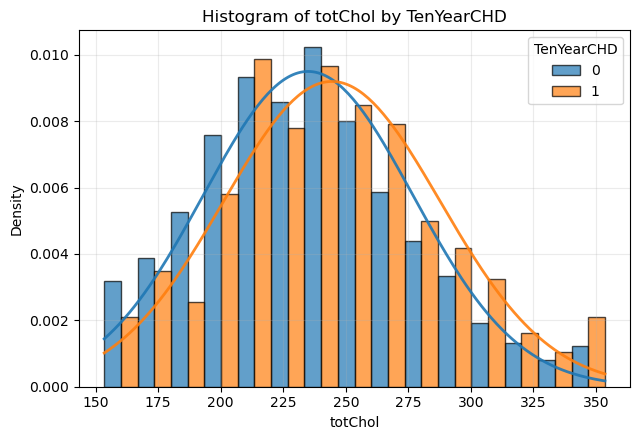

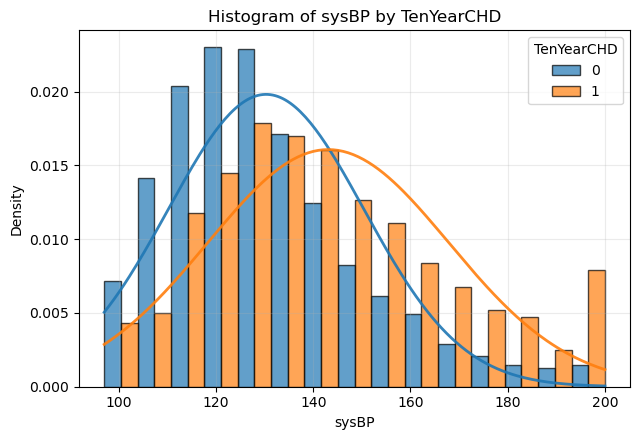

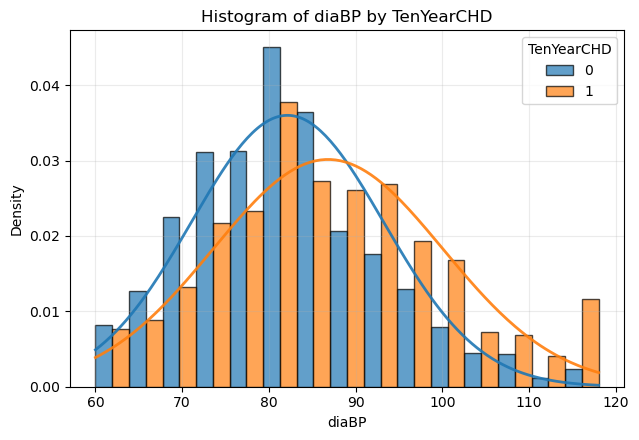

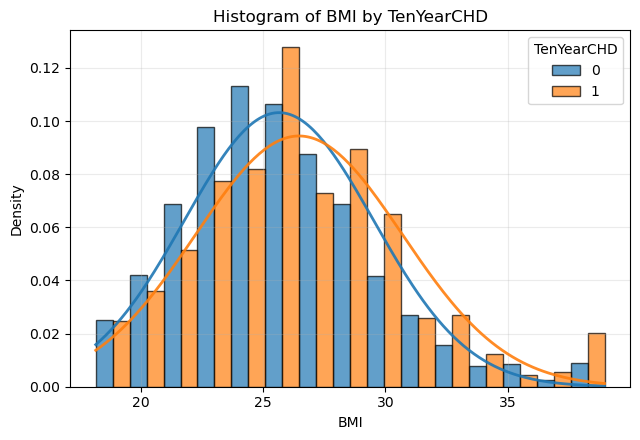

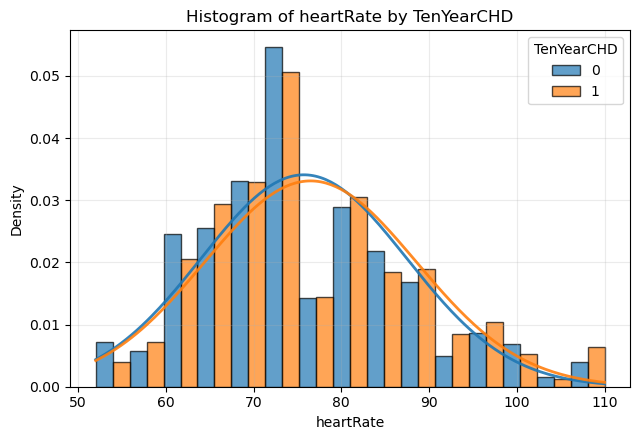

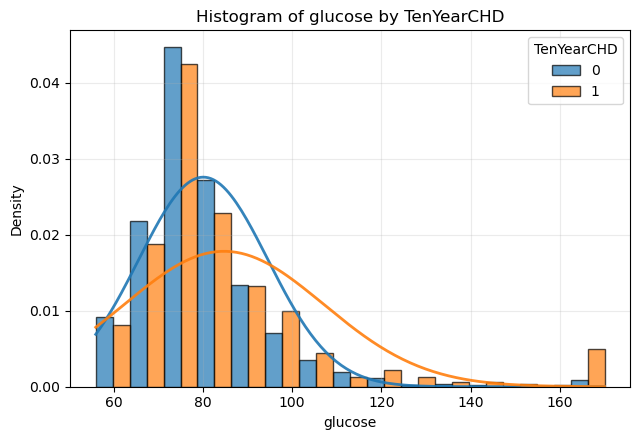

In [13]:
# Grouped Histograms for continuous variables by TenYearCHD
for col in continuous_cols:
    show_grouped_histograms(df[[col, 'TenYearCHD']], category_col='TenYearCHD', bins=15, layout='separate')


## 6. Violin Plots by CHD

Violin plots combine boxplots and density plots, allowing us to visualize the distribution of continuous variables for patients with and without CHD.  

Observations:

- CHD patients tend to have higher age, BMI, systolic/diastolic BP, and glucose.  
- Skewed distributions highlight outliers and variance, important for predictive modeling (supports H1).  


/var/folders/51/b88m_0s92sgbb_58mhvtn7k00000gn/T/ipykernel_18999/2975350321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TenYearCHD', y=col, data=df, palette='Set2')


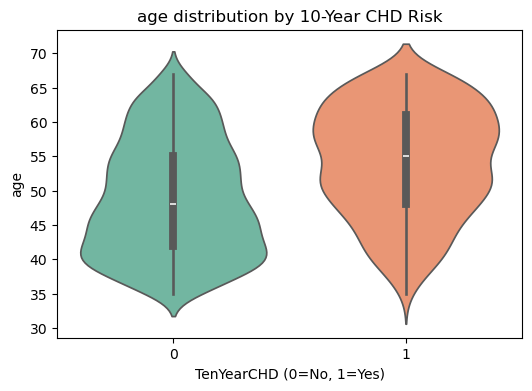

/var/folders/51/b88m_0s92sgbb_58mhvtn7k00000gn/T/ipykernel_18999/2975350321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TenYearCHD', y=col, data=df, palette='Set2')


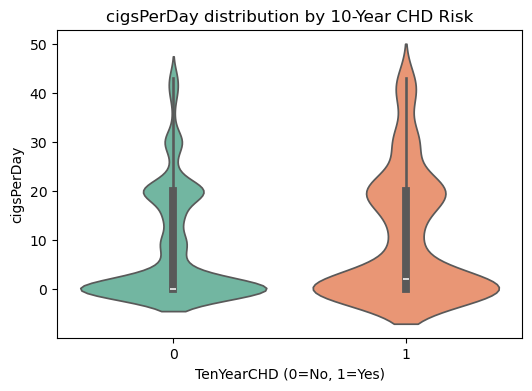

/var/folders/51/b88m_0s92sgbb_58mhvtn7k00000gn/T/ipykernel_18999/2975350321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TenYearCHD', y=col, data=df, palette='Set2')


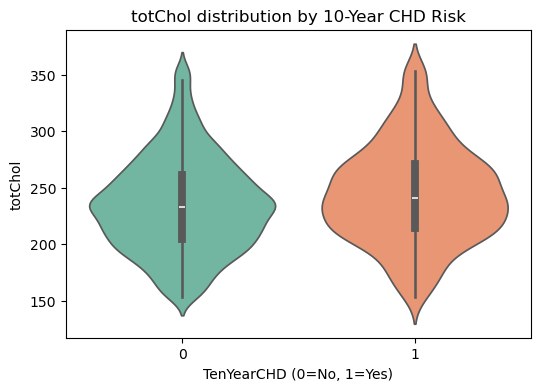

/var/folders/51/b88m_0s92sgbb_58mhvtn7k00000gn/T/ipykernel_18999/2975350321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TenYearCHD', y=col, data=df, palette='Set2')


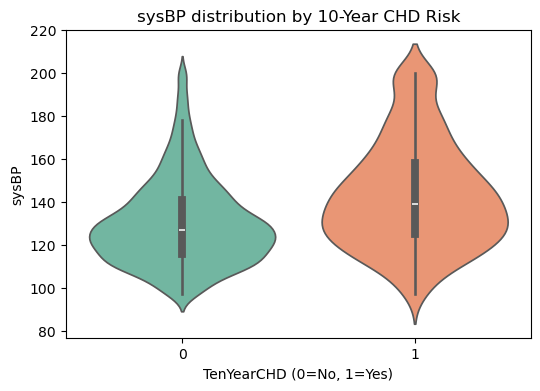

/var/folders/51/b88m_0s92sgbb_58mhvtn7k00000gn/T/ipykernel_18999/2975350321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TenYearCHD', y=col, data=df, palette='Set2')


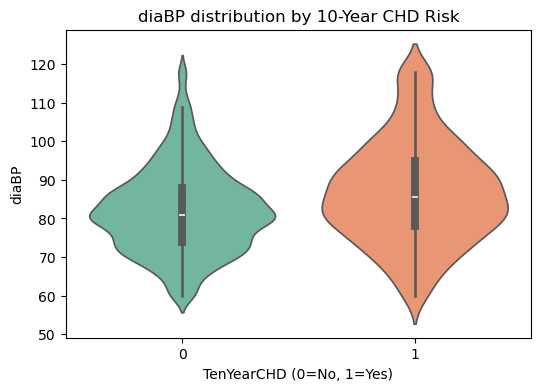

/var/folders/51/b88m_0s92sgbb_58mhvtn7k00000gn/T/ipykernel_18999/2975350321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TenYearCHD', y=col, data=df, palette='Set2')


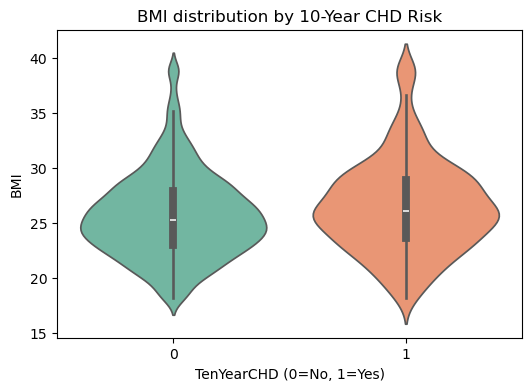

/var/folders/51/b88m_0s92sgbb_58mhvtn7k00000gn/T/ipykernel_18999/2975350321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TenYearCHD', y=col, data=df, palette='Set2')


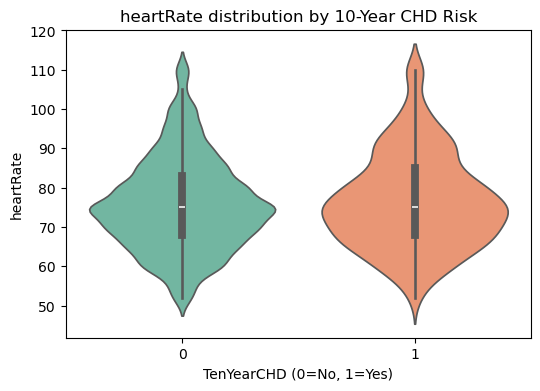

/var/folders/51/b88m_0s92sgbb_58mhvtn7k00000gn/T/ipykernel_18999/2975350321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TenYearCHD', y=col, data=df, palette='Set2')


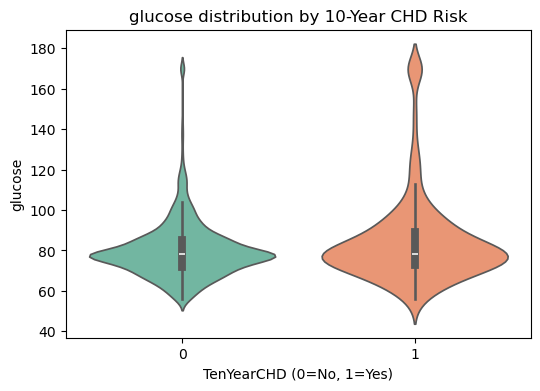

In [14]:
# Violin plots for continuous variables by TenYearCHD
for col in continuous_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='TenYearCHD', y=col, data=df, palette='Set2')
    plt.title(f'{col} distribution by 10-Year CHD Risk')
    plt.xlabel('TenYearCHD (0=No, 1=Yes)')
    plt.ylabel(col)
    plt.show()


## 7. Binary Variable Analysis

Count plots show the distribution of binary variables across the population.  

- Smoking, diabetes, and hypertension prevalence can be visually assessed.  
- Helps non-technical users understand risk patterns (supports H2).  


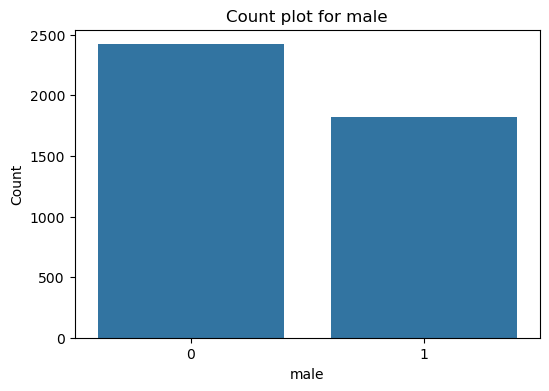

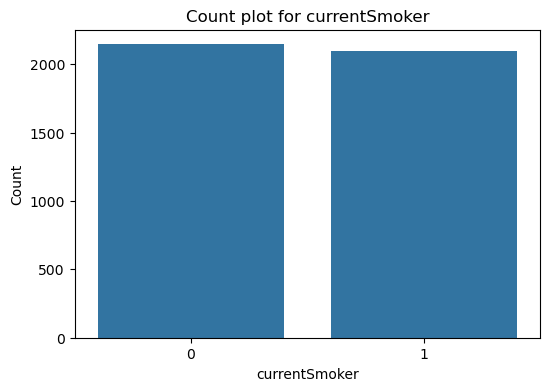

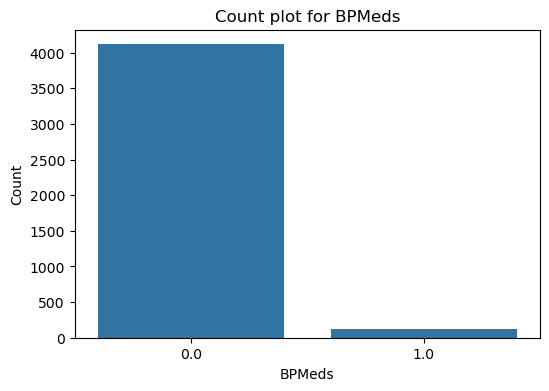

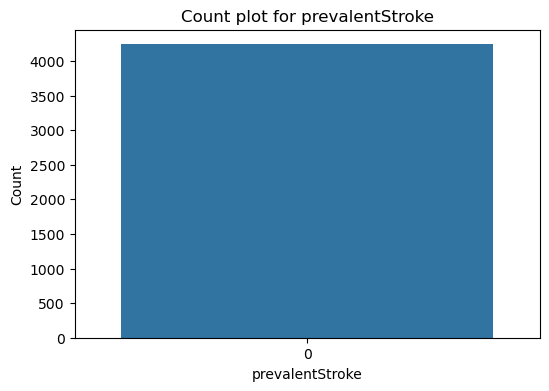

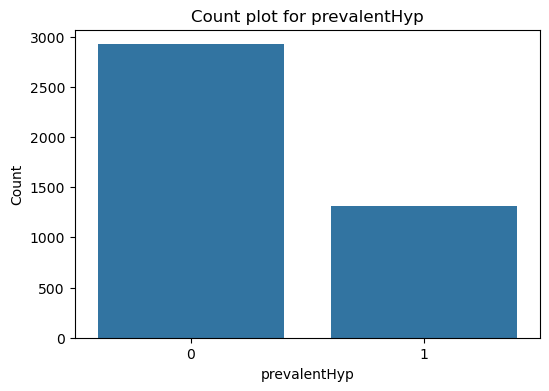

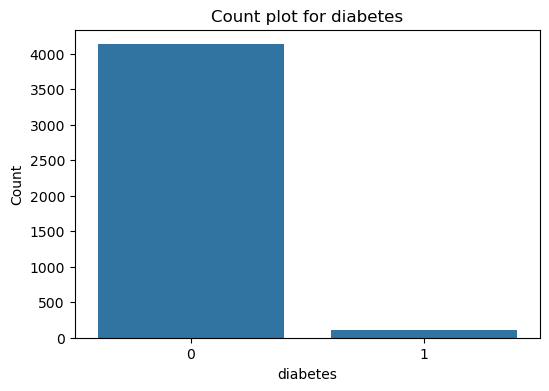

In [15]:
# Count plots for binary variables
for col in binary_cols[:-1]:  # Exclude TenYearCHD itself
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count plot for {col}')
    plt.ylabel('Count')
    plt.show()


## 8. Proportion of TenYearCHD per Binary Variable

Stacked bar plots show the probability of CHD for each category of binary variables.  

- This helps identify high-risk groups (e.g., smokers vs. non-smokers).  
- Supports H1 and provides actionable insights for preventive interventions (supports H3).  


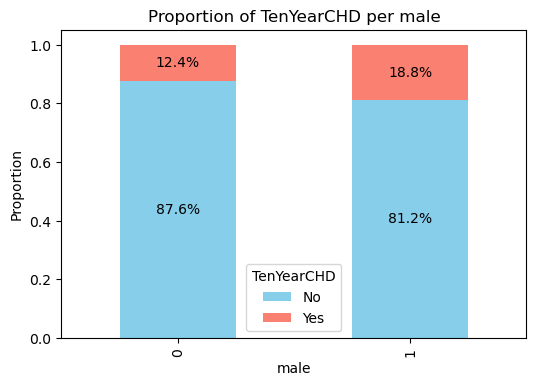

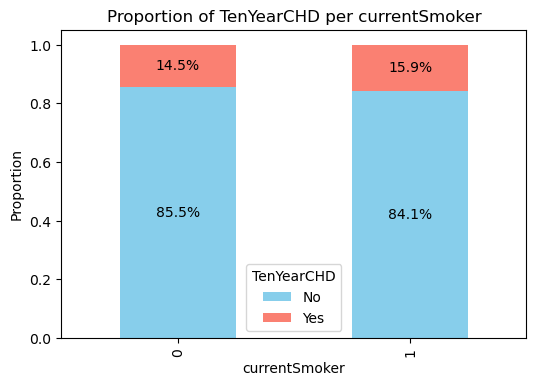

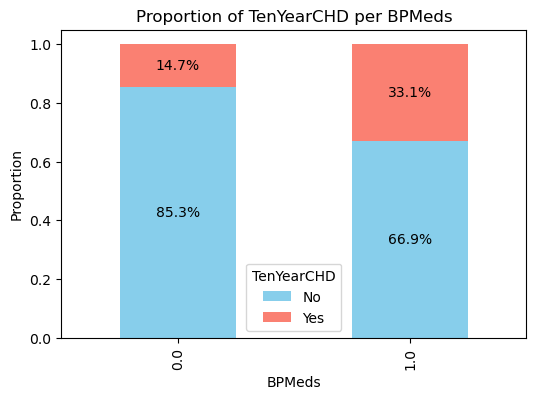

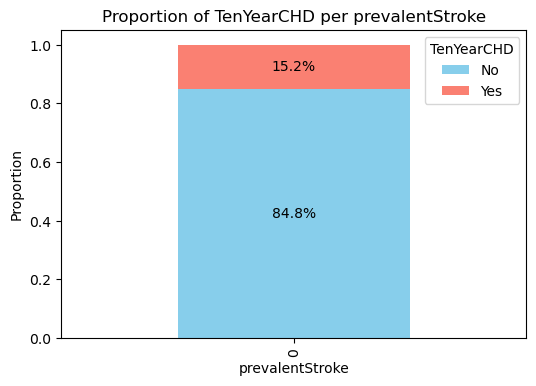

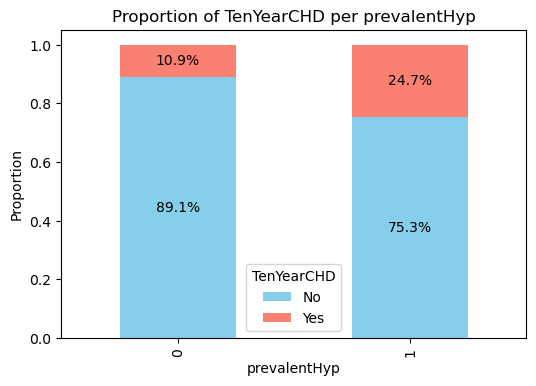

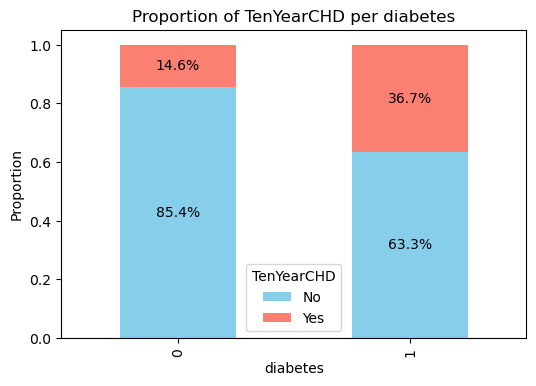

In [16]:
# Stacked bar plots for CHD proportions per binary variable
for binary_col in binary_cols[:-1]:
    cross = pd.crosstab(df[binary_col], df['TenYearCHD'], normalize='index')
    ax = cross.plot(kind='bar', stacked=True, figsize=(6,4), color=['skyblue', 'salmon'])
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(x + width/2, y + height/2, f'{height*100:.1f}%', ha='center', va='center', fontsize=10, color='black')
    plt.title(f'Proportion of TenYearCHD per {binary_col}')
    plt.ylabel('Proportion')
    plt.xlabel(binary_col)
    plt.legend(title='TenYearCHD', labels=['No', 'Yes'])
    plt.show()


## 9. Binned Data Analysis

Binned data analysis shows how one variable changes across ranges of another.  

Example: BMI vs. Age bins  
- Older age groups have higher BMI on average, which correlates with CHD risk.  
- Identifies high-risk age groups, useful for preventive healthcare planning (supports H1 and H3).  


/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:232: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_vals = binned_df.groupby('bin')[column_to_plot].mean()


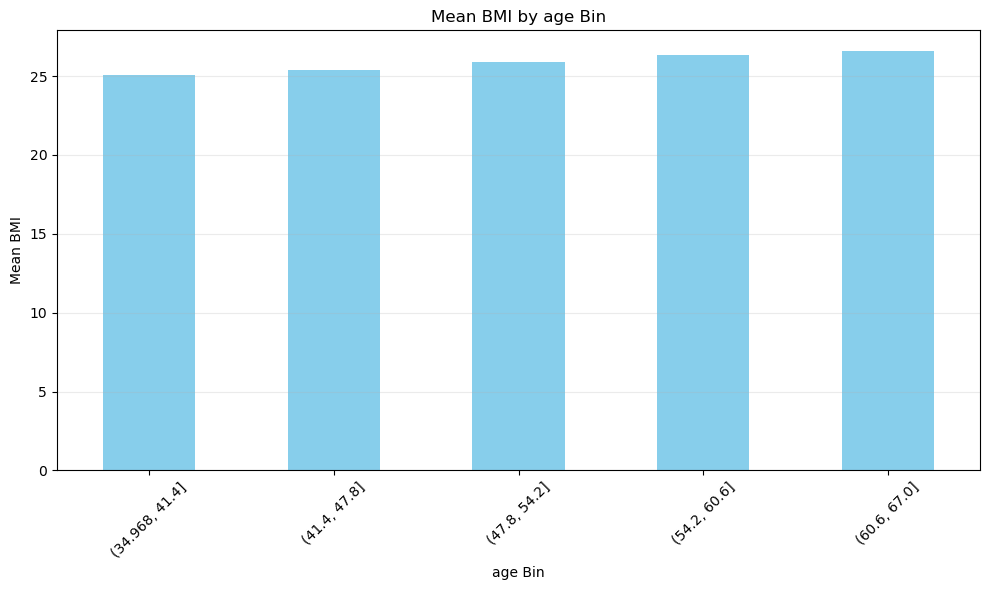

bin
(34.968, 41.4]    25.075606
(41.4, 47.8]      25.407264
(47.8, 54.2]      25.900432
(54.2, 60.6]      26.360822
(60.6, 67.0]      26.574416
Name: BMI, dtype: float64

In [17]:
# Binned data example: BMI by age
show_binned_data(df, column_to_bin='age', column_to_plot='BMI', bins=5, aggregation_method='mean')


# Research Questions 

## 1. How can BI and ML be applied to analyze patient health and lifestyle data for preventive purposes?

- **Business Intelligence (BI):**  
  - Visualizations (boxplots, histograms, violin plots, heatmaps) provide insights into variables such as age, BMI, blood pressure, glucose, and smoking behavior.  
  - Grouped visualizations help healthcare staff identify high-risk patient groups.  
  - Binned data analyses (e.g., BMI per age group) support planning of preventive interventions.

- **Machine Learning (ML):**  
  - Classification models can be trained using `TenYearCHD` as the target.  
  - Models identify high-risk patients based on combinations of factors and provide quantifiable risk (supports H1).  
  - When integrated into dashboards, ML provides real-time insights into patient risk.

---

## 2. Which factors are most predictive of lifestyle-related disease risk?

- **Strongest predictive factors identified from the data and visualizations:**
  - **Age** – older patients have higher risk.
  - **BMI** – higher BMI correlates with higher CHD risk.
  - **Blood Pressure (sysBP, diaBP)** – elevated blood pressure in the CHD group.
  - **Glucose** – higher levels in patients with CHD.
  - **Smoking behavior** (currentSmoker, cigsPerDay, smoking_pack_years).  
  - Additional factors: prevalentHyp (hypertension), diabetes.

- **Examples from the dataset:**  
  - Patients with `TenYearCHD=1` (e.g., rows 4, 29, 45) often have higher BMI, higher systolic BP, and smoke.  
  - Patients with `TenYearCHD=0` (e.g., rows 1, 2, 5) have lower BP, lower BMI, and often do not smoke.

**Conclusion:** The combination of age, BMI, blood pressure, glucose, and smoking behavior is highly predictive of lifestyle-related disease (supports H1).

---

## 3. How can predictive models be integrated into a usable BI solution for healthcare providers?

- **Practical integration steps:**  
  1. **Data preprocessing:** Cleaning, normalization, handling missing values.  
  2. **Model training:** Train ML models with `TenYearCHD` as target.  
  3. **Risk scoring:** Compute CHD probability for each patient.  
  4. **Visualization:** Integrate model results into dashboards:
     - Heatmaps showing risk per factor.  
     - Grouped histograms/violin plots for risk categories.  
     - Scorecards or color-coded risk levels (high, medium, low).  
  5. **Intervention support:** Healthcare staff can use the dashboard to prioritize preventive measures (supports H3).

**Conclusion:** Integrating predictive models into BI dashboards provides actionable insights, supporting early interventions and potentially reducing future treatment costs.


# Assessment of Hypotheses 

## H1: Combination of demographic, lifestyle, and health data predicts increased risk of lifestyle related diseases
- Fully supported
- The Random Forest and Logistic Regression models use all available features.
- Performance metrics (ROC AUC, Accuracy, Precision, Recall, F1) show that the models can identify high-risk patients.
- Feature importance and EDA visualizations confirm that demographic, lifestyle, and health data contribute to risk prediction.

## H2: Visualizations and dashboards help healthcare staff understand risk patterns
- Strongly supported
- The Streamlit dashboard provides:
  - Correlation matrix
  - Histograms and boxplots
  - Interactive binned analysis
  - Clustering with average CHD risk per cluster
- The dashboard offers a practical, interactive BI tool to explore patterns and identify risk groups.

## H3: Predictive models support early interventions and reduce treatment costs
- Partially supported
- The dashboard enables:
  - Individual patient predictions with adjustable risk thresholds
  - Visualization of predicted CHD probability
- This allows early identification of high-risk patients and potential preventive actions.
- Direct evidence for reduced future treatment costs would require additional longitudinal data or workflow integration, which is not yet implemented.


### Interpretation of Predictive Model Results

The Random Forest model demonstrates a **ROC AUC of 0.661**, which indicates a moderate ability to distinguish between patients who will develop heart disease within ten years and those who will not. While this is better than random guessing (0.5), it suggests there is substantial room for improvement in predictive power.  

The **accuracy of 0.245** appears very low. This is likely due to the highly imbalanced nature of the dataset, where only a small fraction of patients develop heart disease. In such cases, accuracy alone is not a reliable measure of performance.  

The model shows a **high recall of 0.977**, meaning it successfully identifies almost all true positive cases. This is critical in a preventive healthcare context, as missing high-risk patients could have serious consequences. However, the **precision is only 0.165**, indicating that many patients flagged as high-risk by the model are actually false positives. This trade-off is typical when prioritizing recall over precision.  

The **F1-score of 0.283** reflects this imbalance between precision and recall, providing a single metric that highlights the model's struggle to maintain precision while capturing nearly all positive cases.  

**Practical interpretation:**  
- The model is useful for **screening and early detection**, ensuring high-risk patients are flagged for further evaluation.  
- Due to low precision, additional follow-up tests or risk stratification methods are needed to avoid unnecessary interventions.  
- Overall, the model supports **preventive healthcare strategies** by prioritizing patient safety over minimizing false positives.
